# G16 Code for Network bridge rank

In [8]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns
import random



## 1. Load data

In [2]:
# import data from file
file_name = '../data/processed/demo_100_with_traffic_and_pop_density.csv'
df_road = pd.read_csv(file_name)

In [3]:
df_road.head(3)

,Unnamed: 0,length,condition,lat,lon,intersection,model_type,id,road,name,...,sink_selection_probability,geometry,index_right,Population density (people per sq. km.),quantile,length_norm,quantile_norm,length_pop,pop_norm,length_popden
0,0,4.0,NaN,23.706028,90.443333,NaN,sourcesink,10000,N1,NaN,...,0.153071,POINT (90.443333 23.7060278),1498.0,21545.0,7.0,0.000402,1.0,0.500201,0.311098,0.155750
1,1,1800.0,NaN,23.702383,90.451097,0,link,10001,N1,NaN,...,NaN,POINT (90.45109704 23.70238323),755.0,68732.0,7.0,0.180850,1.0,0.590425,1.000000,0.590425
2,2,11.3,A,23.698739,90.458861,NaN,bridge,10002,N1,NaN,...,NaN,POINT (90.45886108 23.69873866),1498.0,21545.0,7.0,0.001135,1.0,0.500568,0.311098,0.156117


## 2. Calculate betweenness centrality

In [51]:
# calculate the betweenness centrality
def betweenness_centrality(df, weight):
    """
    Calculate the betweenness centrality of each node in the graph.
    """
    # Create a directed graph
    G = nx.Graph()

    # Add nodes: Each road segment (lat, lon) becomes a node
    for _, row in df.iterrows():
        G.add_node(row['id'], pos=(row['lon'], row['lat']), model_type=row['model_type'])

    # Add edges based on road connectivity
    for i in range(len(df) - 1):
        if df.iloc[i]['road'] == df.iloc[i + 1]['road']: # Ensure edges are within the same road
            G.add_edge(df.iloc[i]['id'], df.iloc[i + 1]['id'], weight=df.iloc[i][weight])

    # Extract node positions for visualization
    pos = nx.get_node_attributes(G, 'pos')

    # print number of nodes and edges
    print("Number of nodes: ", G.number_of_nodes())
    print("Number of edges: ", G.number_of_edges())

    print(f"\nBetweenness centrality is based on the '{weight}' attribute of the edges.")

    # Calculate the betweenness centrality of each node
    betweenness = nx.betweenness_centrality(G, weight='weight')

    # Filter only nodes with model_type 'bridge'
    bridges = {n: c for n, c in betweenness.items() if G.nodes[n].get('model_type') == 'bridge'}

    # Sort bridges by betweenness centrality
    sorted_bridges = sorted(bridges.items(), key=lambda x: x[1], reverse=True)

    # calculate the average value in sorted_bridges
    average = sum(c for _, c in sorted_bridges) / len(sorted_bridges)
    print(f"\nAverage betweenness centrality of bridges: {average}")

    # Print top 10 bridges
    print("\nTop 10 bridges by betweenness centrality:")
    for node, centrality in sorted_bridges[:10]:
        print(f"Bridge {node}: {centrality}")

    # Print the top 10 bridges
    top10_bridges = [node for node, _ in sorted_bridges[:10]]
    node_colors = []
    node_sizes = []

    for node in G.nodes:
        if node in top10_bridges:
            node_colors.append('red')      # Highlight top bridges in red
            node_sizes.append(50)          # Larger size for emphasis
        else:
            node_colors.append('orange')  # Other nodes
            node_sizes.append(5)

    # Draw the full network
    plt.figure(figsize=(10, 7))
    nx.draw(G, pos, with_labels=False, node_color=node_colors, edge_color='gray', node_size=node_sizes, font_size=8)
    plt.title("Network with Top 10 Bridges Highlighted")
    plt.show()

    return bridges


Number of nodes:  2829
Number of edges:  2830

Betweenness centrality is based on the 'length' attribute of the edges.

Average betweenness centrality of bridges: 0.15235777564775502

Top 10 bridges by betweenness centrality:
Bridge 10242: 0.32584418461301384
Bridge 10244: 0.32584390317853357
Bridge 10240: 0.3258424647356342
Bridge 10246: 0.32584162043219334
Bridge 10238: 0.3258387435463947
Bridge 10248: 0.32583733637399315
Bridge 10236: 0.3258330210452952
Bridge 10250: 0.3258310510039331
Bridge 10234: 0.32582529723233583
Bridge 10252: 0.3258227643220131


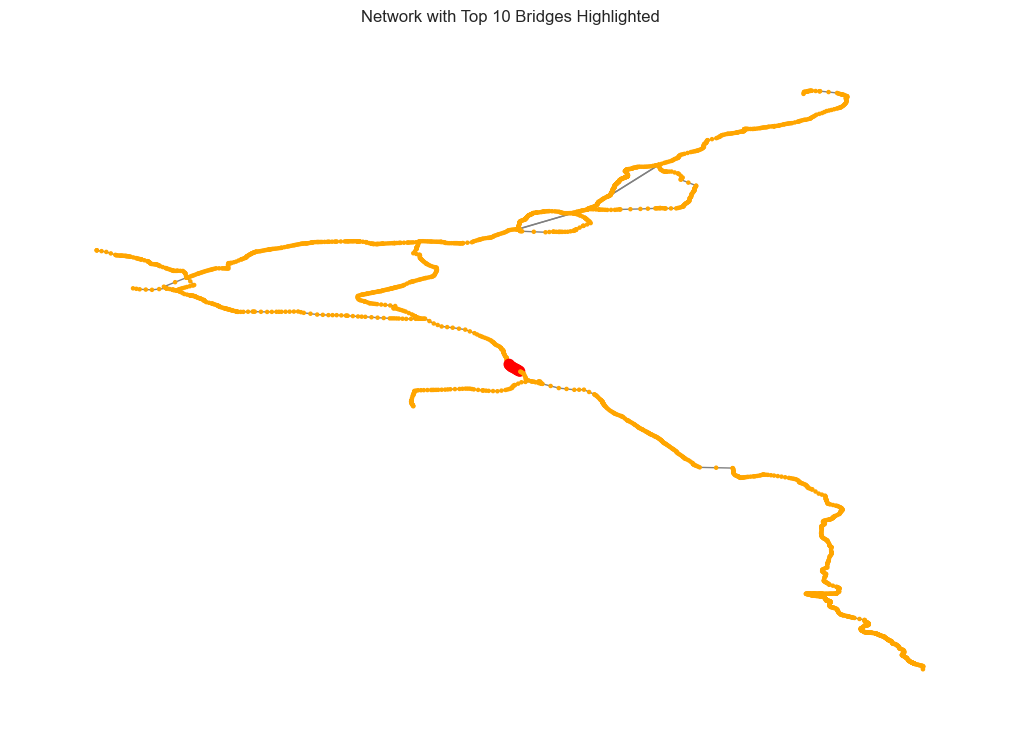

In [52]:
# caluclate the betweenness centrality based on weight 'length'
centrality_length = betweenness_centrality(df_road,'length')

Number of nodes:  2829
Number of edges:  2830

Betweenness centrality is based on the 'quantile' attribute of the edges.

Average betweenness centrality of bridges: 0.23307387331058196

Top 10 bridges by betweenness centrality:
Bridge 10160: 0.49114594616771295
Bridge 10162: 0.4909548208850902
Bridge 10164: 0.4907616942906075
Bridge 10166: 0.49056656638426493
Bridge 10168: 0.4903694371660624
Bridge 10170: 0.4901703066359999
Bridge 10172: 0.48996917479407753
Bridge 10174: 0.48976604164029525
Bridge 10176: 0.489560907174653
Bridge 10178: 0.48935377139715086


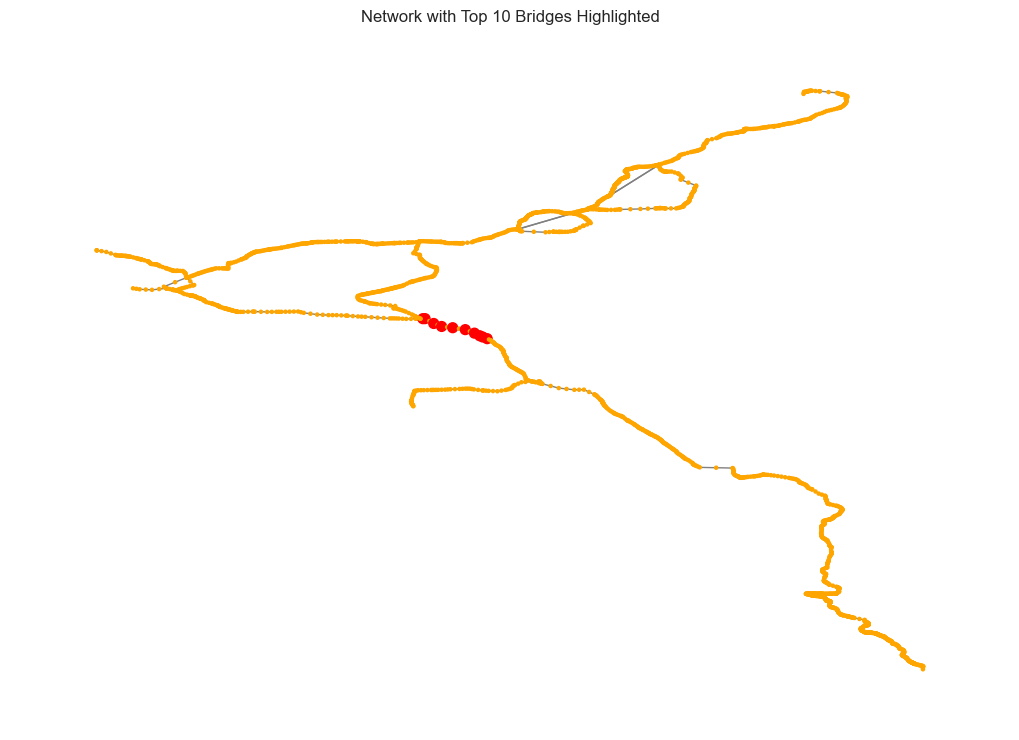

In [53]:
# caluclate the betweenness centrality based on weight population density 'quantile'
centrality_pop = betweenness_centrality(df_road,'quantile')

Number of nodes:  2829
Number of edges:  2830

Betweenness centrality is based on the 'length_popden' attribute of the edges.

Average betweenness centrality of bridges: 0.23311856557874755

Top 10 bridges by betweenness centrality:
Bridge 10160: 0.49114594616771295
Bridge 10162: 0.4909548208850902
Bridge 10164: 0.4907616942906075
Bridge 10166: 0.49056656638426493
Bridge 10168: 0.4903694371660624
Bridge 10170: 0.4901703066359999
Bridge 10172: 0.48996917479407753
Bridge 10174: 0.48976604164029525
Bridge 10176: 0.489560907174653
Bridge 10178: 0.48935377139715086


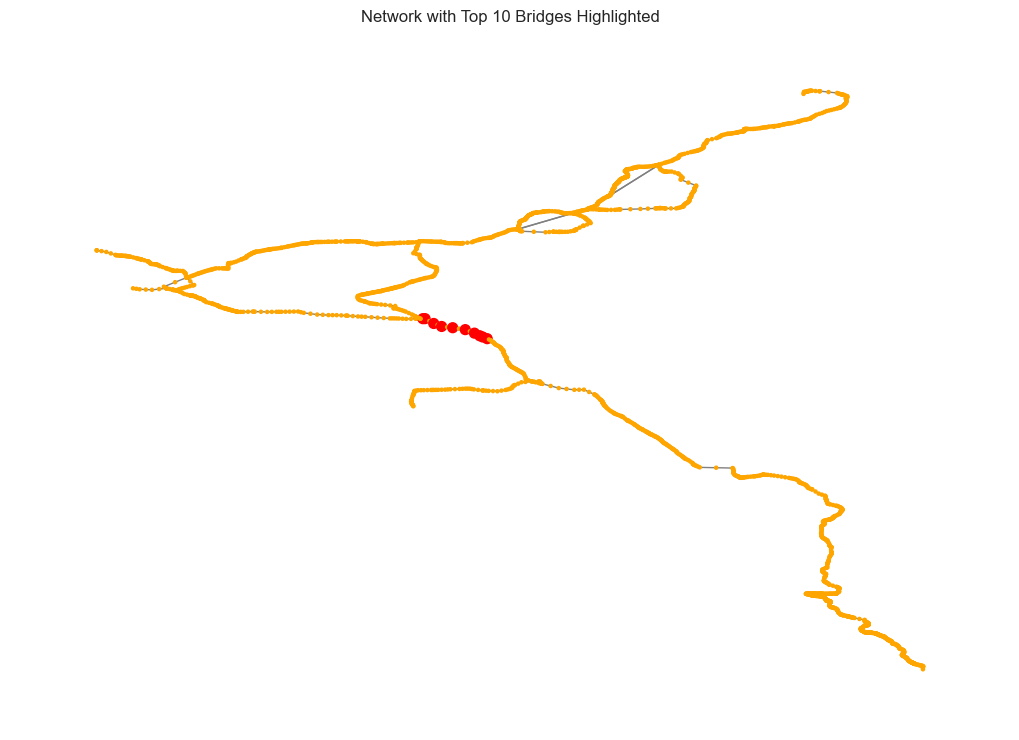

In [54]:
# caluclate the betweenness centrality based on weight length and population density 'length_popden' (50% length + 50% population density)
centrality_length_pop = betweenness_centrality(df_road,'length_popden')

## 3. Analyze betweenness centrality and rank bridges

In [24]:
# List the top 10 bridges
top10_bridge = sorted(centrality_length_pop.items(), key=lambda x: x[1], reverse=True)[:10]
top10_bridge

[(10160, 0.49114594616771295),
 (10162, 0.4909548208850902),
 (10164, 0.4907616942906075),
 (10166, 0.49056656638426493),
 (10168, 0.4903694371660624),
 (10170, 0.4901703066359999),
 (10172, 0.48996917479407753),
 (10174, 0.48976604164029525),
 (10176, 0.489560907174653),
 (10178, 0.48935377139715086)]

In [32]:
# get the rows of the top 10 bridges from the original dataframe
top10_bridge_ids = [bridge[0] for bridge in top10_bridge]
top10_bridge_rows = df_road[df_road['id'].isin(top10_bridge_ids)]
top10_bridge_rows

,Unnamed: 0,length,condition,lat,lon,intersection,model_type,id,road,name,...,sink_selection_probability,geometry,index_right,Population density (people per sq. km.),quantile,length_norm,quantile_norm,length_pop,pop_norm,length_popden
160,160,1.40,A,23.479408,91.123892,NaN,bridge,10160,N1,NaN,...,NaN,POINT (91.12389208 23.47940839),2299.0,5434.0,6.0,0.000141,0.833333,0.416737,0.075888,0.038014
162,162,2.90,A,23.479545,91.129047,NaN,bridge,10162,N1,NaN,...,NaN,POINT (91.12904714 23.47954492),2299.0,5434.0,6.0,0.000291,0.833333,0.416812,0.075888,0.038090
164,164,23.40,A,23.443634,91.149367,NaN,bridge,10164,N1,NaN,...,NaN,POINT (91.14936682 23.44363396),379.0,1971.0,5.0,0.002351,0.666667,0.334509,0.025330,0.013840
166,166,35.97,C,23.421249,91.167894,NaN,bridge,10166,N1,NaN,...,NaN,POINT (91.16789434 23.42124877),379.0,1971.0,5.0,0.003614,0.666667,0.335140,0.025330,0.014472
168,168,27.35,C,23.411932,91.193903,NaN,bridge,10168,N1,NaN,...,NaN,POINT (91.19390298 23.41193242),NaN,NaN,5.0,0.002748,0.666667,0.334707,0.025330,0.014039
170,170,27.90,A,23.397652,91.223422,NaN,bridge,10170,N1,NaN,...,NaN,POINT (91.22342213 23.39765182),NaN,NaN,5.0,0.002803,0.666667,0.334735,0.025330,0.014067
172,172,30.48,A,23.371365,91.245018,NaN,bridge,10172,N1,NaN,...,NaN,POINT (91.24501754 23.37136478),1773.0,2140.0,5.0,0.003062,0.666667,0.334865,0.027797,0.015430
174,174,22.80,C,23.352164,91.257291,NaN,bridge,10174,N1,NaN,...,NaN,POINT (91.25729107 23.35216368),1865.0,1253.0,3.0,0.002291,0.333333,0.167812,0.014848,0.008569
176,176,14.30,A,23.342671,91.264486,NaN,bridge,10176,N1,NaN,...,NaN,POINT (91.26448564 23.34267147),2274.0,1874.0,5.0,0.001437,0.666667,0.334052,0.023914,0.012675
178,178,24.00,A,23.330146,91.274879,NaN,bridge,10178,N1,NaN,...,NaN,POINT (91.27487928 23.33014623),2274.0,1874.0,5.0,0.002411,0.666667,0.334539,0.023914,0.013163


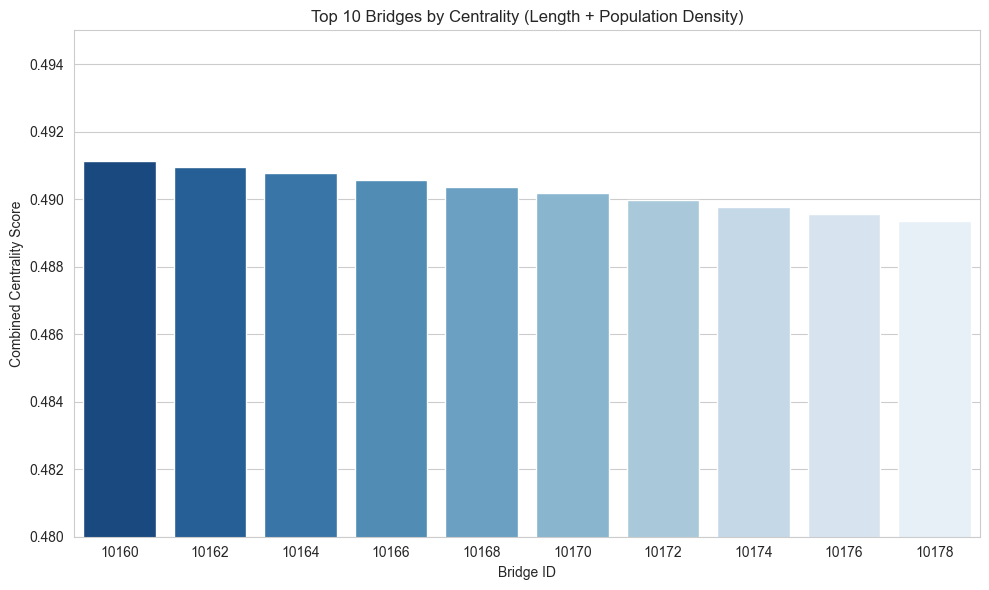

In [34]:
# Convert your list of tuples into a DataFrame
df_top10 = pd.DataFrame(top10_bridge, columns=["bridge_id", "centrality_score"])
df_top10["bridge_id"] = df_top10["bridge_id"].astype(str)  # for prettier x-axis labels


sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))
sns.barplot(data=df_top10, x="bridge_id", y="centrality_score", hue="bridge_id",
            dodge=False, palette="Blues_r", legend=False)
plt.ylim(0.48, 0.495)
plt.xlabel("Bridge ID")
plt.ylabel("Combined Centrality Score")
plt.title("Top 10 Bridges by Centrality (Length + Population Density)")
plt.tight_layout()
plt.show()